In [ ]:
%run youtube_api_crawler.ipynb

In [1]:
from youtube_api_crawler import crawler_api as crawler

In [2]:
import pandas as pd
import numpy as np
import requests
import json
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [3]:
columns = ['artist','song_title','duration','player_width','player_height','video_id','y']

In [6]:
official_df = pd.read_csv('official_MV.csv')
unofficial_df = pd.read_csv('unofficial_MV.csv')

In [11]:
unofficial_df.to_csv('unofficial_MV.csv', index = False)

In [12]:
unofficial_df = unofficial_df[:2000]

In [13]:
official_df.columns = columns
unofficial_df.columns = columns

In [14]:
working_df = pd.concat([official_df, unofficial_df])

In [18]:
official = list(official_df.duration.values)
unofficial = list(unofficial_df.duration.values)

In [ ]:
official_labels = list(official_df.)

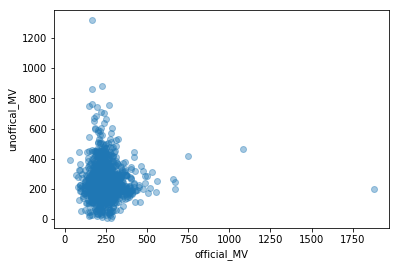

In [23]:
plt.scatter(official, unofficial, alpha = 0.4)
plt.xlabel('official_MV')
plt.ylabel('unoffical_MV')
plt.show()

In [40]:
[np.percentile(official, 25),np.percentile(official, 75)]

[203.7375, 263.68]

In [41]:
[np.percentile(unofficial, 25),np.percentile(unofficial, 75)]

[185.0, 272.83]

In [42]:
working_df.shape

(4000, 7)

In [43]:
working_df.y = working_df.y.apply(lambda row : 1 if row == "A" else 0 )

In [44]:
working_df.head()

,artist,song_title,duration,player_width,player_height,video_id,y
0,Post Malone,rockstar (feat. 21 Savage),241.87,1280,720,UceaB4D0jpo,1
1,Above & Beyond,All Over the World (feat. Alex Vargas),270.77,1280,676,U-zC8BkPBZM,1
2,MAN WITH A MISSION,Find You,325.33,1280,720,rYS9ZdGt9Ko,1
3,Wally Ballago Seck,Bodioudo,320.52,480,360,E5XzF4c1Lw8,1
4,Ben Howard,Nica Libres At Dusk,394.88,1280,720,NzcV8HXE_EI,1


In [46]:
working_df['search_keyword'] = working_df.song_title + ' - ' + working_df.artist
working_df.head()

,artist,song_title,duration,player_width,player_height,video_id,y,search_keyword
0,Post Malone,rockstar (feat. 21 Savage),241.87,1280,720,UceaB4D0jpo,1,rockstar (feat. 21 Savage) - Post Malone
1,Above & Beyond,All Over the World (feat. Alex Vargas),270.77,1280,676,U-zC8BkPBZM,1,All Over the World (feat. Alex Vargas) - Above...
2,MAN WITH A MISSION,Find You,325.33,1280,720,rYS9ZdGt9Ko,1,Find You - MAN WITH A MISSION
3,Wally Ballago Seck,Bodioudo,320.52,480,360,E5XzF4c1Lw8,1,Bodioudo - Wally Ballago Seck
4,Ben Howard,Nica Libres At Dusk,394.88,1280,720,NzcV8HXE_EI,1,Nica Libres At Dusk - Ben Howard


In [51]:
crawler.search_list_by_id('UceaB4D0jpo', part = 'snippet, statistics', test = True)

{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/fNigEIH6ztZLCTF0St_7kXMw-nc"',
 'items': [{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/58FgbnItKG3svRmW0zqAhyPf7FI"',
            'id': 'UceaB4D0jpo',
            'kind': 'youtube#video',
            'snippet': {'categoryId': '10',
                        'channelId': 'UCOhtMAg7xh8wv_wUHMgFc-Q',
                        'channelTitle': 'PostMaloneVEVO',
                        'defaultAudioLanguage': 'en-US',
                        'description': 'rockstar ft. 21 Savage (Official '
                                       'Video)\n'
                                       'Song Available Here: '
                                       'https://PostMalone.lnk.to/rsYD \n'
                                       '\n'
                                       'Connect with Post Malone:\n'
                                       'https://www.facebook.com/postmalone \n'
                                       'https://twitter.com/postmalone \n'
                        

In [53]:
working_df['meta'] = working_df.video_id.apply(lambda row: crawler.search_list_by_id(row, part = 'snippet, statistics'))

In [60]:
working_df.to_json('test.json', orient = 'records')
test_df = pd.read_json('test.json')
test_df.iloc[1].meta['items'][0]['snippet']['title']

'Above & Beyond feat. Alex Vargas - "All Over The World" (Official Music Video)'

In [67]:
working_df = working_df[pd.isnull(working_df.meta) == False]

In [68]:
working_df['title_on_youtube'] = working_df.meta.apply(lambda row: row['items'][0]['snippet']['title'])

In [69]:
working_df['channelId'] = working_df.meta.apply(lambda row: row['items'][0]['snippet']['channelId'])

In [70]:
working_df['video_viewCount'] = working_df.meta.apply(lambda row : row['items'][0]['statistics']['viewCount'])

In [81]:
working_df.head()

,artist,song_title,duration,player_width,player_height,video_id,y,search_keyword,meta,title_on_youtube,channelId,video_viewCount
0,Post Malone,rockstar (feat. 21 Savage),241.87,1280,720,UceaB4D0jpo,1,rockstar (feat. 21 Savage) - Post Malone,"{'kind': 'youtube#videoListResponse', 'etag': ...",Post Malone - rockstar ft. 21 Savage,UCOhtMAg7xh8wv_wUHMgFc-Q,449680363
1,Above & Beyond,All Over the World (feat. Alex Vargas),270.77,1280,676,U-zC8BkPBZM,1,All Over the World (feat. Alex Vargas) - Above...,"{'kind': 'youtube#videoListResponse', 'etag': ...","Above & Beyond feat. Alex Vargas - ""All Over T...",UCVE-ybBDg3UHSUylEVdPAsw,1931778
2,MAN WITH A MISSION,Find You,325.33,1280,720,rYS9ZdGt9Ko,1,Find You - MAN WITH A MISSION,"{'kind': 'youtube#videoListResponse', 'etag': ...",MAN WITH A MISSION 『Find You』,UCCy_q-N7F2FOIZ6ZggHIAKg,1340627
3,Wally Ballago Seck,Bodioudo,320.52,480,360,E5XzF4c1Lw8,1,Bodioudo - Wally Ballago Seck,"{'kind': 'youtube#videoListResponse', 'etag': ...",Wally Ballago Seck - bo dioudo,UCVZXJLPHbOADqiup8XqKcLA,117098
4,Ben Howard,Nica Libres At Dusk,394.88,1280,720,NzcV8HXE_EI,1,Nica Libres At Dusk - Ben Howard,"{'kind': 'youtube#videoListResponse', 'etag': ...",Ben Howard - Nica Libres At Dusk,UCFS0CJgXUt7NjwrUN--vFRg,1624752


In [90]:
working_df['title_on_youtube'] = working_df.title_on_youtube.apply(lambda row: row.lower())

In [91]:
working_df.head()

,artist,song_title,duration,player_width,player_height,video_id,y,search_keyword,meta,title_on_youtube,channelId,video_viewCount
0,Post Malone,rockstar (feat. 21 Savage),241.87,1280,720,UceaB4D0jpo,1,rockstar (feat. 21 Savage) - Post Malone,"{'kind': 'youtube#videoListResponse', 'etag': ...",post malone - rockstar ft. 21 savage,UCOhtMAg7xh8wv_wUHMgFc-Q,449680363
1,Above & Beyond,All Over the World (feat. Alex Vargas),270.77,1280,676,U-zC8BkPBZM,1,All Over the World (feat. Alex Vargas) - Above...,"{'kind': 'youtube#videoListResponse', 'etag': ...","above & beyond feat. alex vargas - ""all over t...",UCVE-ybBDg3UHSUylEVdPAsw,1931778
2,MAN WITH A MISSION,Find You,325.33,1280,720,rYS9ZdGt9Ko,1,Find You - MAN WITH A MISSION,"{'kind': 'youtube#videoListResponse', 'etag': ...",man with a mission 『find you』,UCCy_q-N7F2FOIZ6ZggHIAKg,1340627
3,Wally Ballago Seck,Bodioudo,320.52,480,360,E5XzF4c1Lw8,1,Bodioudo - Wally Ballago Seck,"{'kind': 'youtube#videoListResponse', 'etag': ...",wally ballago seck - bo dioudo,UCVZXJLPHbOADqiup8XqKcLA,117098
4,Ben Howard,Nica Libres At Dusk,394.88,1280,720,NzcV8HXE_EI,1,Nica Libres At Dusk - Ben Howard,"{'kind': 'youtube#videoListResponse', 'etag': ...",ben howard - nica libres at dusk,UCFS0CJgXUt7NjwrUN--vFRg,1624752


In [102]:
video_marks = ['official music video', 'music video', 'official video']

In [103]:
working_df['mv_masking'] = working_df.title_on_youtube.apply(lambda row :  1 if any([i in row for i in video_marks]) == True else 0)

In [221]:
working_df.head()

,artist,channelId,duration,meta,mv_masking,player_height,player_width,search_keyword,song_title,title_on_youtube,video_id,video_viewCount,y,channel_meta,channel_subCount,channel_viewCount
0,Post Malone,UCOhtMAg7xh8wv_wUHMgFc-Q,241.87,"{'kind': 'youtube#videoListResponse', 'etag': ...",0,720,1280,rockstar (feat. 21 Savage) - Post Malone,rockstar (feat. 21 Savage),post malone - rockstar ft. 21 savage,UceaB4D0jpo,449680363,1,"{'kind': 'youtube#channelListResponse', 'etag'...",4152281,2423719656
1,Above & Beyond,UCVE-ybBDg3UHSUylEVdPAsw,270.77,"{'kind': 'youtube#videoListResponse', 'etag': ...",1,676,1280,All Over the World (feat. Alex Vargas) - Above...,All Over the World (feat. Alex Vargas),"above & beyond feat. alex vargas - ""all over t...",U-zC8BkPBZM,1931778,1,"{'kind': 'youtube#channelListResponse', 'etag'...",601202,196598047
2,MAN WITH A MISSION,UCCy_q-N7F2FOIZ6ZggHIAKg,325.33,"{'kind': 'youtube#videoListResponse', 'etag': ...",0,720,1280,Find You - MAN WITH A MISSION,Find You,man with a mission 『find you』,rYS9ZdGt9Ko,1340627,1,"{'kind': 'youtube#channelListResponse', 'etag'...",1387084,1583887822
3,Wally Ballago Seck,UCVZXJLPHbOADqiup8XqKcLA,320.52,"{'kind': 'youtube#videoListResponse', 'etag': ...",0,360,480,Bodioudo - Wally Ballago Seck,Bodioudo,wally ballago seck - bo dioudo,E5XzF4c1Lw8,117098,1,"{'kind': 'youtube#channelListResponse', 'etag'...",15217,8795785
4,Ben Howard,UCFS0CJgXUt7NjwrUN--vFRg,394.88,"{'kind': 'youtube#videoListResponse', 'etag': ...",0,720,1280,Nica Libres At Dusk - Ben Howard,Nica Libres At Dusk,ben howard - nica libres at dusk,NzcV8HXE_EI,1624752,1,"{'kind': 'youtube#channelListResponse', 'etag'...",209566,101654143


In [222]:
working_df.to_json('test.json', orient = 'records')

In [8]:
working_df = pd.read_json('test.json')

In [9]:
working_df.head()

,artist,channelId,duration,meta,mv_masking,player_height,player_width,search_keyword,song_title,title_on_youtube,video_id,video_viewCount,y
0,Post Malone,UCOhtMAg7xh8wv_wUHMgFc-Q,241.87,"{'kind': 'youtube#videoListResponse', 'etag': ...",0,720,1280,rockstar (feat. 21 Savage) - Post Malone,rockstar (feat. 21 Savage),post malone - rockstar ft. 21 savage,UceaB4D0jpo,449680363,1
1,Above & Beyond,UCVE-ybBDg3UHSUylEVdPAsw,270.77,"{'kind': 'youtube#videoListResponse', 'etag': ...",1,676,1280,All Over the World (feat. Alex Vargas) - Above...,All Over the World (feat. Alex Vargas),"above & beyond feat. alex vargas - ""all over t...",U-zC8BkPBZM,1931778,1
2,MAN WITH A MISSION,UCCy_q-N7F2FOIZ6ZggHIAKg,325.33,"{'kind': 'youtube#videoListResponse', 'etag': ...",0,720,1280,Find You - MAN WITH A MISSION,Find You,man with a mission 『find you』,rYS9ZdGt9Ko,1340627,1
3,Wally Ballago Seck,UCVZXJLPHbOADqiup8XqKcLA,320.52,"{'kind': 'youtube#videoListResponse', 'etag': ...",0,360,480,Bodioudo - Wally Ballago Seck,Bodioudo,wally ballago seck - bo dioudo,E5XzF4c1Lw8,117098,1
4,Ben Howard,UCFS0CJgXUt7NjwrUN--vFRg,394.88,"{'kind': 'youtube#videoListResponse', 'etag': ...",0,720,1280,Nica Libres At Dusk - Ben Howard,Nica Libres At Dusk,ben howard - nica libres at dusk,NzcV8HXE_EI,1624752,1


In [120]:
from youtube_api_crawler import crawler_api as crawler

In [11]:
working_df['channel_meta'] = working_df.channelId.apply(lambda row : crawler.search_list_by_channel(row, part = 'snippet, statistics'))

In [20]:
working_df.iloc[0].channel_meta['items'][0]['statistics']['viewCount']

'2423719656'

In [23]:
working_df = working_df[pd.isnull(working_df.channel_meta) == False]

In [25]:
working_df['channel_subCount'] = working_df.channel_meta.apply(lambda row: row['items'][0]['statistics']['subscriberCount'])
working_df['channel_viewCount'] = working_df.channel_meta.apply(lambda row: row['items'][0]['statistics']['viewCount'])

In [29]:
working_df.head()

,artist,channelId,duration,meta,mv_masking,player_height,player_width,search_keyword,song_title,title_on_youtube,video_id,video_viewCount,y,channel_meta,channel_subCount,channel_viewCount
0,Post Malone,UCOhtMAg7xh8wv_wUHMgFc-Q,241.87,"{'kind': 'youtube#videoListResponse', 'etag': ...",0,720,1280,rockstar (feat. 21 Savage) - Post Malone,rockstar (feat. 21 Savage),post malone - rockstar ft. 21 savage,UceaB4D0jpo,449680363,1,"{'kind': 'youtube#channelListResponse', 'etag'...",4152281,2423719656
1,Above & Beyond,UCVE-ybBDg3UHSUylEVdPAsw,270.77,"{'kind': 'youtube#videoListResponse', 'etag': ...",1,676,1280,All Over the World (feat. Alex Vargas) - Above...,All Over the World (feat. Alex Vargas),"above & beyond feat. alex vargas - ""all over t...",U-zC8BkPBZM,1931778,1,"{'kind': 'youtube#channelListResponse', 'etag'...",601202,196598047
2,MAN WITH A MISSION,UCCy_q-N7F2FOIZ6ZggHIAKg,325.33,"{'kind': 'youtube#videoListResponse', 'etag': ...",0,720,1280,Find You - MAN WITH A MISSION,Find You,man with a mission 『find you』,rYS9ZdGt9Ko,1340627,1,"{'kind': 'youtube#channelListResponse', 'etag'...",1387084,1583887822
3,Wally Ballago Seck,UCVZXJLPHbOADqiup8XqKcLA,320.52,"{'kind': 'youtube#videoListResponse', 'etag': ...",0,360,480,Bodioudo - Wally Ballago Seck,Bodioudo,wally ballago seck - bo dioudo,E5XzF4c1Lw8,117098,1,"{'kind': 'youtube#channelListResponse', 'etag'...",15217,8795785
4,Ben Howard,UCFS0CJgXUt7NjwrUN--vFRg,394.88,"{'kind': 'youtube#videoListResponse', 'etag': ...",0,720,1280,Nica Libres At Dusk - Ben Howard,Nica Libres At Dusk,ben howard - nica libres at dusk,NzcV8HXE_EI,1624752,1,"{'kind': 'youtube#channelListResponse', 'etag'...",209566,101654143


In [173]:
features = ['video_viewCount','channel_subCount','mv_masking','non_mv_marking']


In [174]:
non_mv_marks = ['audio', 'lyric','offcial audio']

In [175]:
training_df = working_df.copy()
training_df['non_mv_marking'] = training_df.title_on_youtube.apply(lambda row :  1 if any([i in row for i in non_mv_marks]) == True else 0)
sub_training_df = training_df[features]
sub_training_df.head()

,video_viewCount,channel_subCount,mv_masking,non_mv_marking
0,449680363,4152281,0,0
1,1931778,601202,1,0
2,1340627,1387084,0,0
3,117098,15217,0,0
4,1624752,209566,0,0


In [176]:
from sklearn.preprocessing import normalize

In [177]:
data_normalized = normalize(sub_training_df, axis = 0, return_norm = True)

In [178]:
data_normalized

(array([[5.14945313e-02, 1.33319660e-02, 0.00000000e+00, 0.00000000e+00],
        [2.21214914e-04, 1.93031364e-03, 3.68354734e-02, 0.00000000e+00],
        [1.53520066e-04, 4.45358991e-03, 0.00000000e+00, 0.00000000e+00],
        ...,
        [4.92408614e-09, 5.77936292e-08, 0.00000000e+00, 0.00000000e+00],
        [9.96268592e-07, 1.06166897e-04, 0.00000000e+00, 0.00000000e+00],
        [9.61914503e-09, 1.41273316e-07, 0.00000000e+00, 0.00000000e+00]]),
 array([8.73258484e+09, 3.11453014e+08, 2.71477439e+01, 1.33790882e+01]))

In [179]:
sub_training_df[features]= data_normalized[0]

C:\Users\KhangPham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KhangPham\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [180]:
sub_training_df.head()

,video_viewCount,channel_subCount,mv_masking,non_mv_marking
0,0.051495,0.013332,0.000000,0.0
1,0.000221,0.001930,0.036835,0.0
2,0.000154,0.004454,0.000000,0.0
3,0.000013,0.000049,0.000000,0.0
4,0.000186,0.000673,0.000000,0.0


In [181]:
sub_training_df.shape

(3933, 4)

In [182]:
training_data, validating_data, training_labels, validating_labels = train_test_split(sub_training_df,training_df['y'], test_size = 0.2,random_state = 166 )  

In [183]:
training_labels = training_labels.astype('int')
validating_labels = validating_labels.astype('int')

In [184]:
training_data

,video_viewCount,channel_subCount,mv_masking,non_mv_marking
2819,1.438978e-06,1.136608e-06,0.000000,0.000000
701,1.100141e-03,3.742137e-05,0.000000,0.000000
3742,2.748327e-09,9.311196e-08,0.000000,0.000000
732,4.388277e-06,1.518688e-06,0.000000,0.000000
1955,1.088210e-01,2.221677e-02,0.036835,0.000000
1521,2.522391e-03,3.702173e-02,0.000000,0.000000
3900,2.222801e-05,2.804596e-05,0.000000,0.000000
1573,7.626045e-02,3.246200e-02,0.000000,0.000000
1961,6.530411e-04,3.579095e-04,0.036835,0.000000
3752,3.746584e-04,4.332336e-03,0.000000,0.000000


In [211]:
#assert(len(training_data) == len(training_labels))
def best_k():
    accuracy = []
    k_list = []
    for k in range(1,100):
        classifier = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
        classifier.fit(training_data, training_labels)
        a = classifier.score(validating_data, validating_labels)
        accuracy.append(a)
        k_list.append(k)
    return accuracy, k_list, np.argmax(accuracy)

In [212]:
accuracy, k_list,idx_max = best_k()

In [213]:
max(accuracy)

0.8614993646759848

In [214]:
idx_max

44

In [189]:
import matplotlib.pyplot as plt

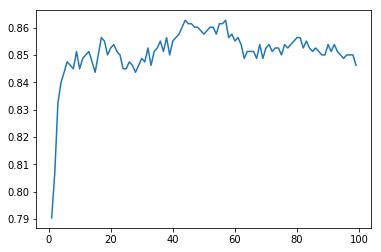

In [190]:
plt.plot(k_list, accuracy)
plt.show()

In [215]:
classifier = KNeighborsClassifier(n_neighbors = 44, weights = 'distance')

In [216]:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=44, p=2,
           weights='distance')

In [320]:
test_data = np.array([4.371564e-04, 1.120037e-03, 1,0])

In [321]:
classifier.predict_proba(test_data.reshape(1, -1))

array([[0., 1.]])

In [322]:
classifier.score(validating_data, validating_labels)

0.8602287166454892

In [229]:
import pickle

In [262]:
filename = 'K_nearest_trained_model.sav'
pickle.dump((classifier,data_normalized[1]), open(filename, 'wb'))

In [263]:
##test load pickle
loaded_model, normalized_attributes = pickle.load(open(filename, 'rb'))
result = loaded_model.score(validating_data, validating_labels)

In [264]:
result

0.8602287166454892

In [265]:
normalized_attributes

array([8.73258484e+09, 3.11453014e+08, 2.71477439e+01, 1.33790882e+01])

In [312]:
test_data = np.array([787275470, 1300000, 1, 0 ])

In [313]:
test_data = test_data/data_normalized[1]

In [323]:
loaded_model.predict(test_data.reshape(1, -1))

array([1])

In [269]:
### this part testing model using decision tree
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()

In [270]:
tree_classifier.fit(training_data, training_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [324]:
tree_classifier.predict(test_data.reshape(1, -1))

array([1])

In [333]:
single_tree = 'DecisionTree_trained_model.sav'
pickle.dump(tree_classifier, open(single_tree, 'wb'))

In [326]:
### this part testing model using random forest
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(max_features = 3)


In [327]:
forest_classifier.fit(training_data, training_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [331]:
forest_classifier.predict(test_data.reshape(1, -1))

array([1])

In [332]:
forest_classifier.score(validating_data, validating_labels)

0.8500635324015248

In [334]:
forest = 'RandomForest_trained_model.sav'
pickle.dump(forest_classifier, open(forest, 'wb'))